# **Proyecto: Limpieza y Análisis Exploratorio de Datos del Conjunto _Iris_**

## **Objetivo:**
#### - Aplicar técnicas de limpieza de datos utilizando `Pandas`.
#### - Realizar análisis exploratorio de datos (EDA) incluyendo visualizaciones como histo-gramas, boxplots y gráficos de dispersión.
#### - Interpretar y comprender las relaciones entre las diferentes características del conjunto de datos.

## **Descripción del proyecto:**
#### En este proyecto, trabajarás con el conjunto de datos **Iris**, que contiene medidas de
#### diferentes características de flores de tres especies de iris: _Setosa_, _Versicolor_ y _Virginica_. El
#### objetivo es limpiar los datos, explorar las características y visualizar las relaciones entre ellas.

## **Pasos a seguir:**

### **1. Importar las librerias necesarias**
#### Importa las librerías que utilizarás a lo largo del proyecto:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **2. Cargar el Conjunto de Datos**
#### El conjunto de datos se puede cargar directamente desde Seaborn:

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **3. Exploración Inicial de los Datos**
#### - Visualiza las primeras filas del conjunto de datos.
#### - Obtén información general del dataset.
#### - Describe estadísticamente las características numéricas.

In [47]:
# INFORMACION GENERAL DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
# INFORMACION ESTADÍSTICA DEL DATASET
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **4. Identificación y Manejo de Valores Faltantes**
#### - Verificar si existen valores faltantes en el conjunto de datos.
#### - En caso de existir, decide si se imputan o se eliminan.

In [54]:
# IDENTIFICACION DE LOS VALORES FALTANTES 

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Notamos que aplicando los métodos `.isnull()` para determinar los volores faltantes (NaN) y `.sum()` para contarlos por fila.
#### No existen valores faltantes en nuestro conjunto de datos, por lo que no se altera nada.

## **5. Detección y Tratamiento de Valores Atípicos (Outliers)**
#### - Utiliza `boxplots` para visualizar posibles outliers en las características numéricas.
#### - Aplica el método del rango intercuartílico (IQR) para identificar y, si es necesario, eliminar los outliers.

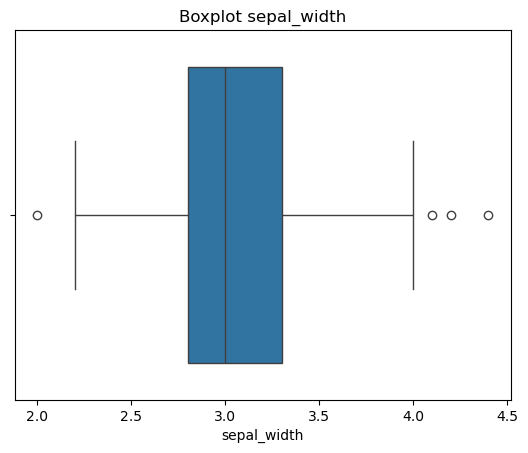

In [87]:
sns.boxplot(x=df['sepal_width'])
plt.title('Boxplot sepal_width')
plt.show()

#### Identificamos que existen _valores atípicos_ (**outliers**) en el rango `2.0` y entre el rango `4.0 a 4.5`

#### **Aplicación del método IQR (InterQuartile Range)**

In [161]:
# LOWER QUARTILE (25% DE LA DATA)
Q1 = df['sepal_width'].quantile(0.25)

# UPPER QUARTILE (75% DE LA DATA)
Q3 = df['sepal_width'].quantile(0.75)

# INTERQUARTILE RANGE (ESTO ES EL RANGO ENTRE EL UPPER QUARTILE Y EL LOWER QUARTILE)
IQR = Q3 - Q1

# 1.5 veces el IQR por debajo del 25%
lower_extreme = Q1 - 1.5 * IQR
# 1.5 veces el IQR por encima del 75%
upper_extreme = Q3 + 1.5 * IQR

#Filtramos y eliminamos los outliers de la columna sepal_width
df = df[(df['sepal_width'] >= lower_extreme) & (df['sepal_width'] <= upper_extreme)]

#### Data Frame post-tratamiento: 

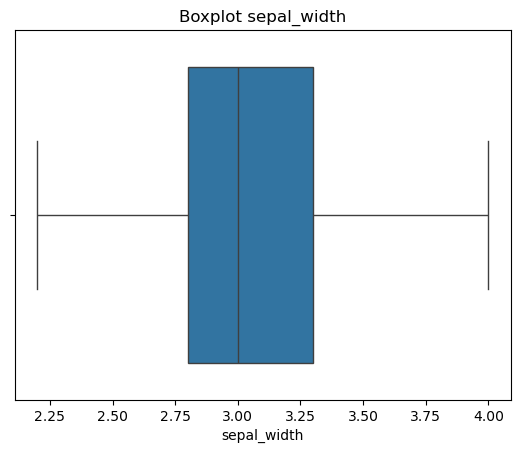

In [163]:
sns.boxplot(x=df['sepal_width'])
plt.title('Boxplot sepal_width')
plt.show()

## **6. Visualización de Datos**
#### - `Historigrama` de cada característica numérica.
#### - `Boxplot` de características por especie.
#### - `Gráficos de disperción` entre pares de características.

### **Historigramas:**

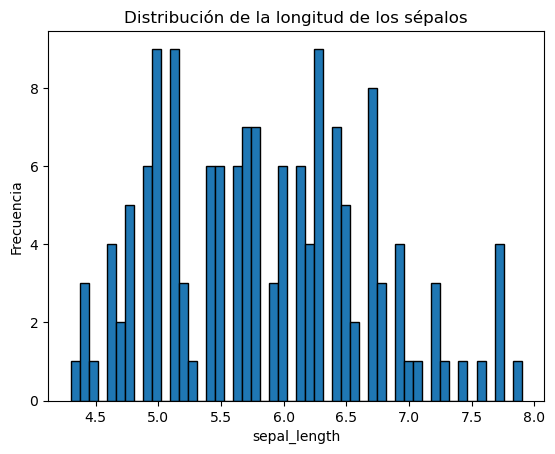

In [166]:
plt.hist(df['sepal_length'], bins=50, edgecolor ='black')
plt.title('Distribución de la longitud de los sépalos')
plt.xlabel('sepal_length')
plt.ylabel('Frecuencia')
plt.show()

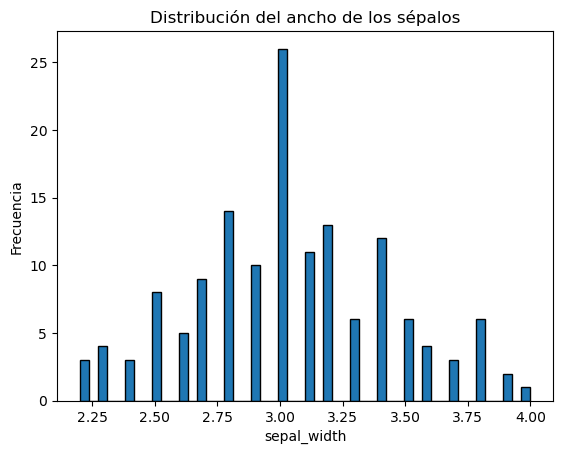

In [168]:
plt.hist(df['sepal_width'], bins=50, edgecolor ='black')
plt.title('Distribución del ancho de los sépalos')
plt.xlabel('sepal_width')
plt.ylabel('Frecuencia')
plt.show()

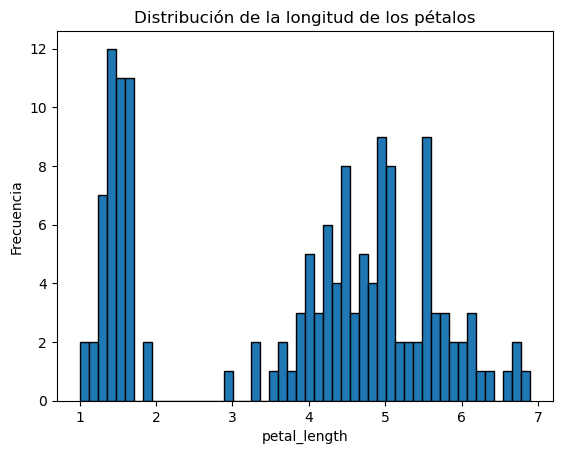

In [170]:
plt.hist(df['petal_length'], bins=50, edgecolor ='black')
plt.title('Distribución de la longitud de los pétalos')
plt.xlabel('petal_length')
plt.ylabel('Frecuencia')
plt.show()

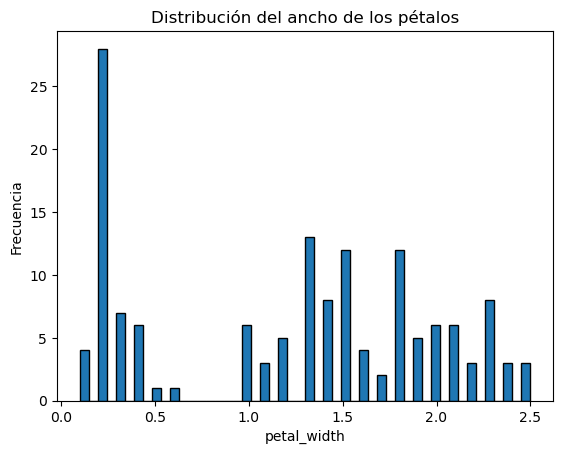

In [172]:
plt.hist(df['petal_width'], bins=50, edgecolor ='black')
plt.title('Distribución del ancho de los pétalos')
plt.xlabel('petal_width')
plt.ylabel('Frecuencia')
plt.show()

### **Boxplots:**

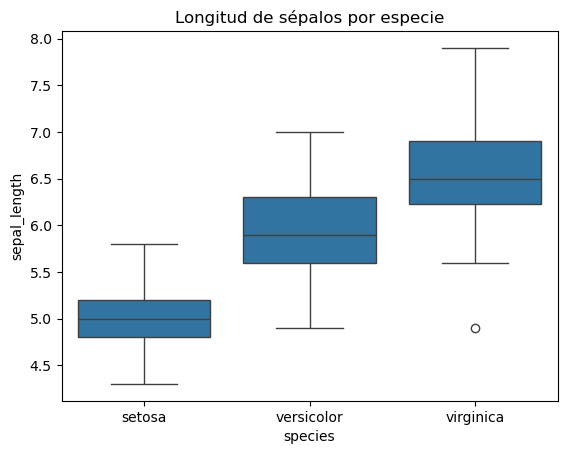

In [156]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Longitud de sépalos por especie')
plt.show()

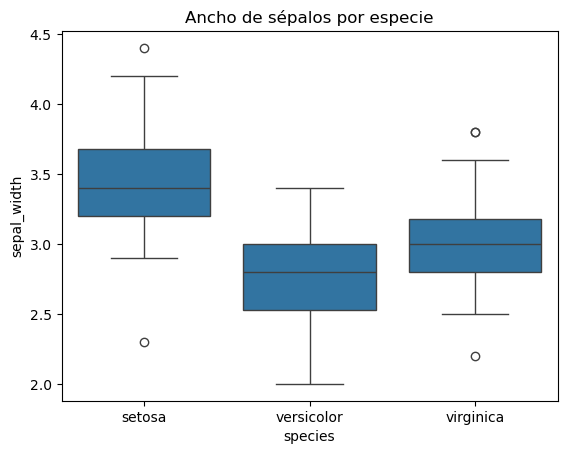

In [55]:
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title('Ancho de sépalos por especie')
plt.show()

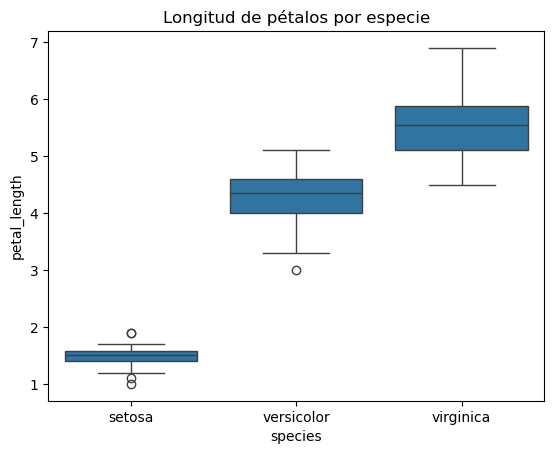

In [57]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Longitud de pétalos por especie')
plt.show()

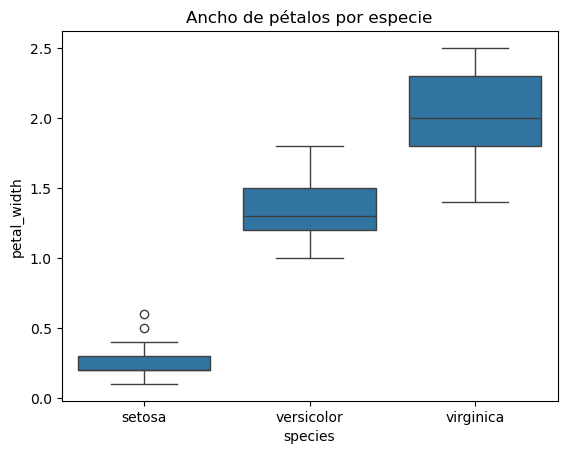

In [59]:
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Ancho de pétalos por especie')
plt.show()

### **Gráficos de disperción:**

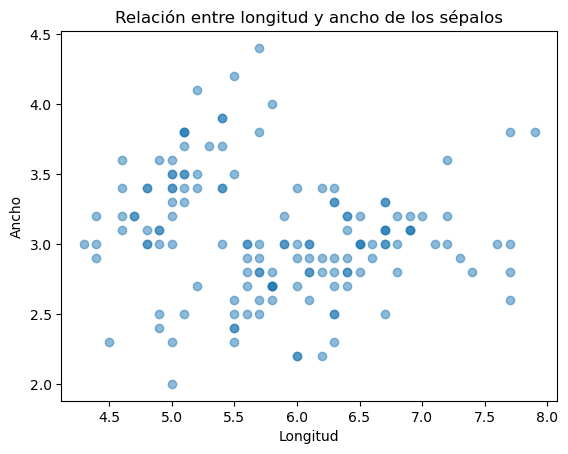

In [61]:
plt.scatter(df['sepal_length'], df['sepal_width'], alpha=0.5)
plt.title('Relación entre longitud y ancho de los sépalos')
plt.xlabel('Longitud')
plt.ylabel('Ancho')
plt.show()

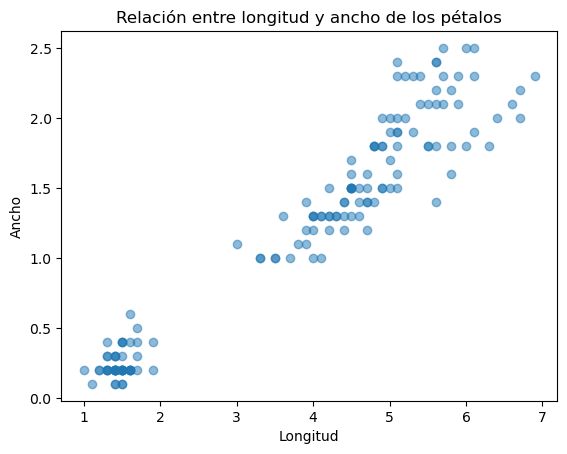

In [63]:
plt.scatter(df['petal_length'], df['petal_width'], alpha=0.5)
plt.title('Relación entre longitud y ancho de los pétalos')
plt.xlabel('Longitud')
plt.ylabel('Ancho')
plt.show()

#### Identificamos que existe un cúmulo de datos específico que corresponden entre __1__ y __2__ de `Longitud`, así como de __0__ a __0.5__ en el `ancho`

## **7. Codificación de Variables Categóricas**
#### Convierte la variable categórica `species` en variables numéricas utilizando `LabelEncoder` o `OneHotEncoder` si es necesario para futuros análisis.

### **Variable categórica `species`:**

In [82]:
df['species'][0:200:25]

0          setosa
25         setosa
50     versicolor
75     versicolor
100     virginica
125     virginica
Name: species, dtype: object

### **Aplicando la técnica `One Hot Encoder`:**

In [84]:
ohe_df = pd.get_dummies(df['species'])
ohe_df[0:200:25]

,setosa,versicolor,virginica
0,True,False,False
25,True,False,False
50,False,True,False
75,False,True,False
100,False,False,True
125,False,False,True


## **8. Normalización y Estandarización de Datos**
#### Estandariza las características numéricas para que tengan `media 0` y `desviación estándar 1`

### **Aplicación del método de normalización `Z-score` en `petal_length`:**

In [100]:
df['pl_zscore'] = (df['petal_length'] - df['petal_length'].mean() / df['petal_length'].std())

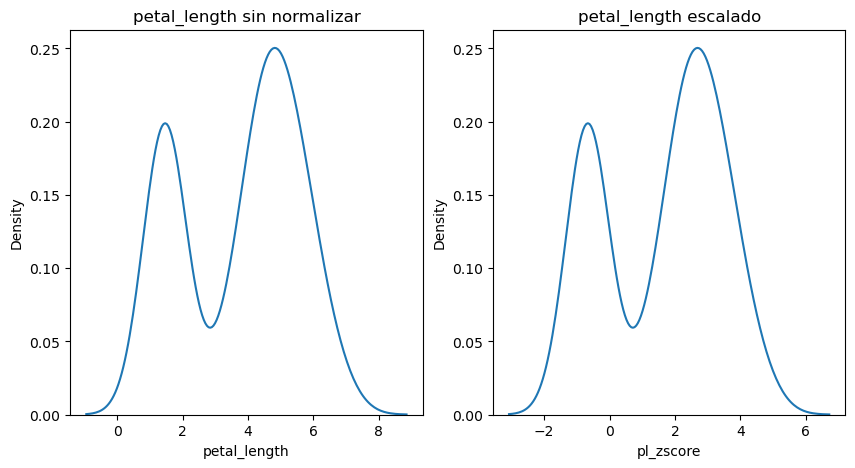

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['petal_length'], ax=ax[0])
ax[0].set_title('petal_length sin normalizar')
sns.kdeplot(df['pl_zscore'], ax=ax[1])
ax[1].set_title('petal_length escalado')
plt.show()

### **Aplicación del método de normalización `Z-score` en `petal_width`:**

In [106]:
df['pw_zscore'] = (df['petal_width'] - df['petal_width'].mean() / df['petal_width'].std())

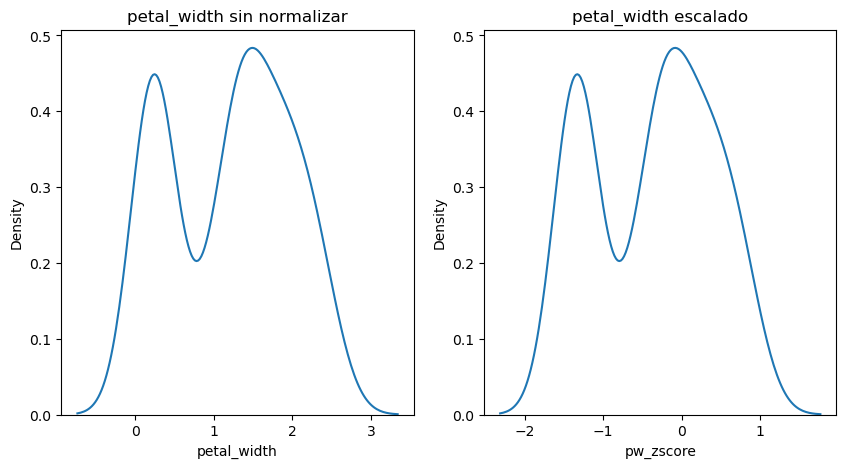

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['petal_width'], ax=ax[0])
ax[0].set_title('petal_width sin normalizar')
sns.kdeplot(df['pw_zscore'], ax=ax[1])
ax[1].set_title('petal_width escalado')
plt.show()

### **Aplicación del método de normalización `Z-score` en `sepal_length`:**

In [112]:
df['sl_zscore'] = (df['sepal_length'] - df['sepal_length'].mean() / df['sepal_length'].std())

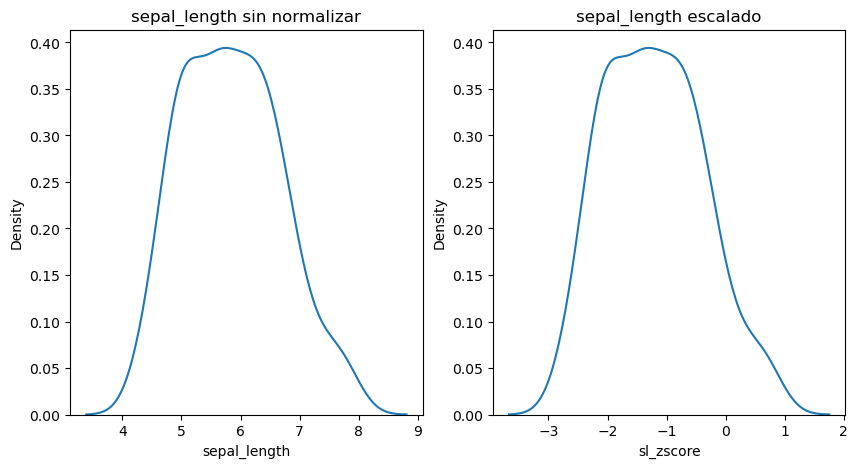

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['sepal_length'], ax=ax[0])
ax[0].set_title('sepal_length sin normalizar')
sns.kdeplot(df['sl_zscore'], ax=ax[1])
ax[1].set_title('sepal_length escalado')
plt.show()

### **Aplicación del método de normalización `Z-score` en `sepal_width`:**

In [120]:
df['sw_zscore'] = (df['sepal_width'] - df['sepal_width'].mean() / df['sepal_width'].std())

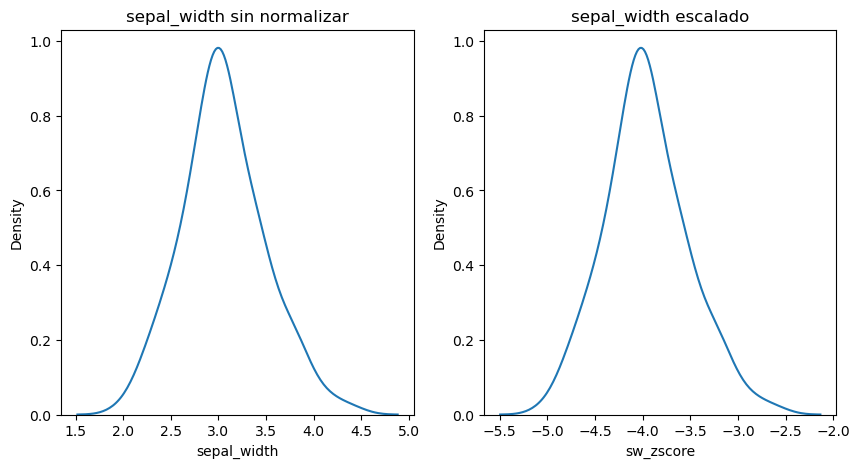

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(df['sepal_width'], ax=ax[0])
ax[0].set_title('sepal_width sin normalizar')
sns.kdeplot(df['sw_zscore'], ax=ax[1])
ax[1].set_title('sepal_width escalado')
plt.show()

## **9. Conclusión**
#### - Escribe una conclusión donde resumas los hallazgos más importantes del análisis exploratorio.
#### - Destaca patrones interesantes o relaciones entre las características y las especies:

> La especie `virginica` es la de mayor **longitud** de _sépalos_ y _pétalos_. Siendo la de mayor tamaño en sus demás características

 > La especie `setosa` es la de mayor **anchura** en sus _sépalos_. Pero siendo la de menos tamañano en sus demás características.

> Identificamos que existe un cúmulo de datos específico que corresponden entre __1__ y __2__ de `Longitud`, así como de __0__ a __0.5__ en el `ancho`.
 A mayor longitud de los pétalos, también será su anchura.